# Tensorflow相关使用

In [1]:
import tensorflow as tf
from __future__ import absolute_import, division, print_function
import warnings
#warnings.filterwarnings('ignore')
#tf.enable_eager_execution()
#tfe = tf.contrib.eager
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use urllib or similar directly.


TimeoutError: [Errno 60] Operation timed out

## tf 常用模块

## 基本操作

In [2]:
sess = tf.Session()
a = tf.constant(1)
b = tf.constant([1,2,6,3])
tf.equal(tf.add(a,b),(a+b))
##reshape
c = tf.reshape(b,shape=[-1,1,2,1])
##增加一个维度
d = tf.expand_dims(c,3)
##转置
e = tf.transpose(d,[1,2,3,0,4])
print(e)
f = tf.arg_max(e,dimension=1)
f = tf.argmax(e,axis=1)
##展开1*D
print(tf.contrib.layers.flatten(e))
tf.cast(b,dtype=tf.float32)
##按某一维度分解tensor
print(d)
print(tf.unstack(d,num=2,axis=2))
d = tf.Print(d,[d],message="warning: ",name="print_op")
e = tf.shape(d)
f = tf.range(10)
f = sess.run(f)
print(f)
t = tf.range(0,10)*10 + tf.constant(1,shape=[10])
t = tf.gather(t,[1,5,9])
print(sess.run(t))
#one_hot encoding
f = tf.one_hot(f,axis=0,depth=10)
print(sess.run(f))
#stack 多个tensor
tf.stack([[[1,2]],[[2,3]]],axis=1)

Tensor("transpose:0", shape=(1, 2, 1, 2, 1), dtype=int32)
Instructions for updating:
Use `argmax` instead
Tensor("Flatten/flatten/Reshape:0", shape=(1, 4), dtype=int32)
Tensor("ExpandDims:0", shape=(2, 1, 2, 1, 1), dtype=int32)
[<tf.Tensor 'unstack:0' shape=(2, 1, 1, 1) dtype=int32>, <tf.Tensor 'unstack:1' shape=(2, 1, 1, 1) dtype=int32>]
[0 1 2 3 4 5 6 7 8 9]
[11 51 91]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


<tf.Tensor 'stack_1:0' shape=(1, 2, 2) dtype=int32>

## 初始化变量

In [78]:
x1 = tf.Variable(tf.random_normal([32]))
w1 = tf.Variable(tf.random_normal([5, 5, 32, 64]))
y = tf.constant(10,shape=[10,20])
x2 = tf.placeholder(tf.float32, [None, 100])
x3 = tf.placeholder(tf.float32)
x5 = tf.placeholder(tf.int32, [None])
def glorot_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))
##xavier初始化
x4 = tf.Variable(glorot_init([10, 10]))
x6 = tf.Variable(tf.random_normal([2,2]))
x7 = tf.Variable(tf.random_uniform([2,2]))
x8 = tf.Variable(tf.truncated_normal([2,2],mean=0.1,stddev=1))
x10 = tf.Variable(tf.zeros([2,2],name="x10"))
with tf.variable_scope("test",reuse=True):
  x9 = tf.get_variable('x9',shape=[2,2],initializer=tf.random_normal_initializer())
  x11 = tf.get_variable('x11',shape=[3,3],initializer=tf.constant_initializer([1,1,1,1,-8,1,1,1,1]))
  x12 = tf.get_variable('x12',shape=[2,2],initializer=tf.zeros_initializer())
  x13 = tf.get_variable('x13',shape=[2,2],initializer=tf.orthogonal_initializer())

## 流程控制

In [91]:
a = tf.Variable(0)
sess.run(tf.initialize_all_variables())
add_a = tf.assign_add(a,1)
add_b = tf.assign_add(a,10)
with tf.control_dependencies([add_a,add_b]):
    b = tf.no_op(name="train")
#     b = tf.identity(a)
for i in range(5):
    print(sess.run(b))
c = tf.group([add_a,add_b])
print(sess.run(a))
print(sess.run(c))

None
None
None
None
None
55
None


## 卷积层

In [59]:
x=tf.constant(0.1,shape=[10,28,28,32])
conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(conv1, 2, 2)
conv2 = tf.nn.conv2d(x, w1, strides=[1, 3, 3, 1], padding='SAME')
pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],padding='SAME')
dconv = tf.layers.conv2d_transpose(conv1, 64, 5, strides=2, padding='same')
batch_layer = tf.layers.batch_normalization(dconv, training=True)
fc1 = tf.contrib.layers.flatten(pool2)
fc1 = tf.layers.dense(fc1, 20)
fc1 = tf.layers.dropout(fc1, rate=0.5, training=True)
fc2 = tf.cast(fc1,tf.int64)


## 激活函数

In [103]:
def leakyrelu(x, alpha=0.2):
    return 0.5 * (1 + alpha) * x + 0.5 * (1 - alpha) * abs(x)
var = tf.constant([-2,1.12111111,3],dtype=tf.float32)
th = tf.nn.tanh(var)
rl = tf.nn.relu(var)
sig = tf.nn.sigmoid(var)
leaky_rl_1 = tf.nn.leaky_relu(var)
leaky_rl_2 = leakyrelu(var)
rl_6 = tf.nn.relu6(var)
sess.run([th,rl,sig,leaky_rl_1,leaky_rl_2,rl_6])

[array([-0.9640276 ,  0.80795515,  0.9950547 ], dtype=float32),
 array([0.       , 1.1211112, 3.       ], dtype=float32),
 array([0.11920292, 0.75419474, 0.95257413], dtype=float32),
 array([-0.4      ,  1.1211112,  3.       ], dtype=float32),
 array([-0.40000004,  1.1211112 ,  3.        ], dtype=float32),
 array([0.       , 1.1211112, 3.       ], dtype=float32)]

## 损失函数

In [27]:
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=fc1, labels=y))
loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=fc1, labels=tf.argmax(y,1)))
acc_op = tf.metrics.accuracy(labels=y, predictions=fc1)

## 优化方法

In [29]:
global_iter = tf.Variable(0, name='global_iter', trainable=False)
lr = tf.train.polynomial_decay(0.0001, global_iter, 2000, end_learning_rate=0.0, power=0.9)
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(loss_op, global_step=global_iter)
train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step(),var_list=[w1])
optimizer = tf.train.MomentumOptimizer(lr, 0.9)
optimizer = tf.train.AdagradDAOptimizer
optimizer = tf.train.AdadeltaOptimizer
optimizer = tf.train.AdagradOptimizer
optimizer = tf.train.RMSPropOptimizer
optimizer = tf.train.FtrlOptimizer
optimizer = tf.train.GradientDescentOptimizer(0.001)

## 特殊卷积方法

In [60]:
tf.nn.atrous_conv2d
tf.nn.depthwise_conv2d

<function tensorflow.python.ops.nn_impl.depthwise_conv2d>

## RNN相关

In [2]:
from tensorflow.contrib import rnn
# Training Parameters
learning_rate = 0.001
training_steps = 10000
batch_size = 128
display_step = 200

# Network Parameters
num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 28 # timesteps
num_hidden = 128 # hidden layer num of features
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, timesteps, num_input])
Y = tf.placeholder("float", [None, num_classes])
weights = {
    'out': tf.Variable(tf.random_normal([num_hidden, num_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([num_classes]))
}
def RNN(x, weights, biases):

    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, timesteps, n_input)
    # Required shape: 'timesteps' tensors list of shape (batch_size, n_input)

    # Unstack to get a list of 'timesteps' tensors of shape (batch_size, n_input)
    x = tf.unstack(x, timesteps, 1)

    # Define a lstm cell with tensorflow
    lstm_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)

    # Get lstm cell output
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)
    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']
logits = RNN(X, weights, biases)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, training_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Reshape data to get 28 seq of 28 elements
        batch_x = batch_x.reshape((batch_size, timesteps, num_input))
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, timesteps, num_input))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: test_data, Y: test_label}))

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 1, Minibatch Loss= 2.7638, Training Accuracy= 0.125
Step 200, Minibatch Loss= 2.1932, Training Accuracy= 0.203
Step 400, Minibatch Loss= 1.9673, Training Accuracy= 0.391
Step 600, Minibatch Loss= 1.8806, Training Accuracy= 0.422
Step 800, Minibatch Loss= 1.7572, Training Accuracy= 0.500
Step 1000, Minibatch Loss= 1.7212, Training Accuracy= 0.445
Step 1200, Minibatch Loss= 1.6170, Training Accuracy= 0.500
Step 1400, Minibatch Loss= 1.4945, Training Accuracy= 0.555
Step 1600, Minibatch Loss= 1.3835, Training Accuracy= 0.586
Step 1800, Minibatch Loss= 1.3608, Training 

In [3]:
lstm_cell

NameError: name 'lstm_cell' is not defined

## tf logging模块

In [1]:
import tensorflow as tf
# Set verbosity to display errors only (Remove this line for showing warnings)
tf.logging.set_verbosity(tf.logging.ERROR)
tf.logging.set_verbosity(tf.logging.INFO)
with tf.name_scope("scope_1"):
    a = tf.Variable(0)
with tf.name_scope("scope_2"):
    b = tf.Variable(0)
#add_a = a.assign_add(1)
#add_b = b.assign_add(1)
tf.summary.scalar("a",a)
tf.summary.scalar("b",b)
merge_all = tf.summary.merge_all()
init_op = tf.initialize_all_variables()
with tf.Session() as sess:
    summary_writer = tf.summary.FileWriter("logs/", graph=tf.get_default_graph())
    init_op.run()
    for i in range(100):
        summary = merge_all.eval()
        summary_writer.add_summary(summary, i)
        #add_a.eval()
        #add_b.eval()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [2]:
# Ignore all GPUs (current TF GBDT does not support GPU).
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

## tf.image

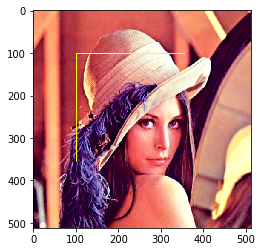

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image
sess = tf.Session()
image = tf.gfile.FastGFile("data/image/lena.jpg","rb")
image = tf.image.decode_jpeg(image.read())
image1 = tf.image.random_brightness(image,0.2)
image2 = tf.image.random_contrast(image,0.5,2)
image3 = tf.image.random_hue(image,0.2)
image4 = tf.image.random_saturation(image,0.5,2)
image5 = tf.image.adjust_brightness(image,0.4)
image6 = tf.image.random_flip_left_right(image)
image7 = tf.image.random_jpeg_quality(image,99,100)
image8 = tf.image.central_crop(image,0.7)
image9 = tf.image.crop_and_resize(tf.expand_dims(image,0),[[0.2,0.2,0.8,0.8]],[0],[100,100])
image10 = tf.image.adjust_gamma(tf.cast(image,np.float32),gamma=1,gain=1)
image11 = tf.image.draw_bounding_boxes(tf.expand_dims(tf.image.convert_image_dtype(image2,tf.float32),0),tf.constant([[[0.2,0.2,0.7,0.7]]]))
image = sess.run(image11)
plt.imshow(image[0])
#plt.imshow(image.astype(np.uint8))
plt.show()
#with tf.gfile.FastGFile("data/image/lena_new.jpg","w") as f:
#    Image.fromarray(image.astype(np.uint8)).save(f)